\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-6
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

## Find
Find the reaction forces and plot the shear and bending diagram.

## Solution
### Reaction Forces

\begin{center}
\includegraphics{images/fig2}
\end{center}

In [2]:
# Getting the reaction forces
Oy_sym, Mo_sym = sp.symbols('O_y M_o')
Oy = 240 + 500
Mo = 500*8 + 240*17
display(sp.Eq(Oy_sym, Oy), sp.Eq(Mo_sym, Mo))  # lbf and lbf*in

Eq(O_y, 740)

Eq(M_o, 8080)

### Bending and Moment Diagram

\begin{center}
\includegraphics{images/fig3}
\end{center}

The equation may be described as the piecewise relationship coded below.

In [3]:
V, M, x = sp.symbols('V M x')

# From O to A
V1 = Oy
M1 = -Mo + Oy*x

# From A to B
V2 = Oy - 500
M2 = -Mo + Oy*x - 500*(x - 8)

# From B to C
V3 = Oy - 500 - 40*(x - 14)
M3 = -Mo + Oy*x - 500*(x - 8) - 40*(x - 14)*(x - 14)/2

eq1 = sp.Eq(V, sp.Piecewise((V1, (x >= 0) & (x < 8)), (V2, (x >= 8) & (x < 14)), (V3, (x >= 14) & (x <= 20))))
eq2 = sp.Eq(M, sp.Piecewise((M1, (x >= 0) & (x < 8)), (M2, (x >= 8) & (x < 14)), (M3, (x >= 14) & (x <= 20))))
display(eq1, eq2)

Eq(V, Piecewise((740, (x >= 0) & (x < 8)), (240, (x >= 8) & (x < 14)), (800 - 40*x, (x >= 14) & (x <= 20))))

Eq(M, Piecewise((740*x - 8080, (x >= 0) & (x < 8)), (240*x - 4080, (x >= 8) & (x < 14)), (240*x - (x - 14)*(40*x - 560)/2 - 4080, (x >= 14) & (x <= 20))))

The important key points for shear are shown in the piecewise function expression above. The key points for the bending moment are,

In [4]:
points = ['O', 'A', 'B', 'C']
values = [0, 8, 14, 20]
for p, v in zip(points, values):
    display(sp.Eq(sp.Symbol(f'M_{p}'), eq2.rhs.subs(x, v)))  # in lbf*in

Eq(M_O, -8080)

Eq(M_A, -2160)

Eq(M_B, -720)

Eq(M_C, 0)

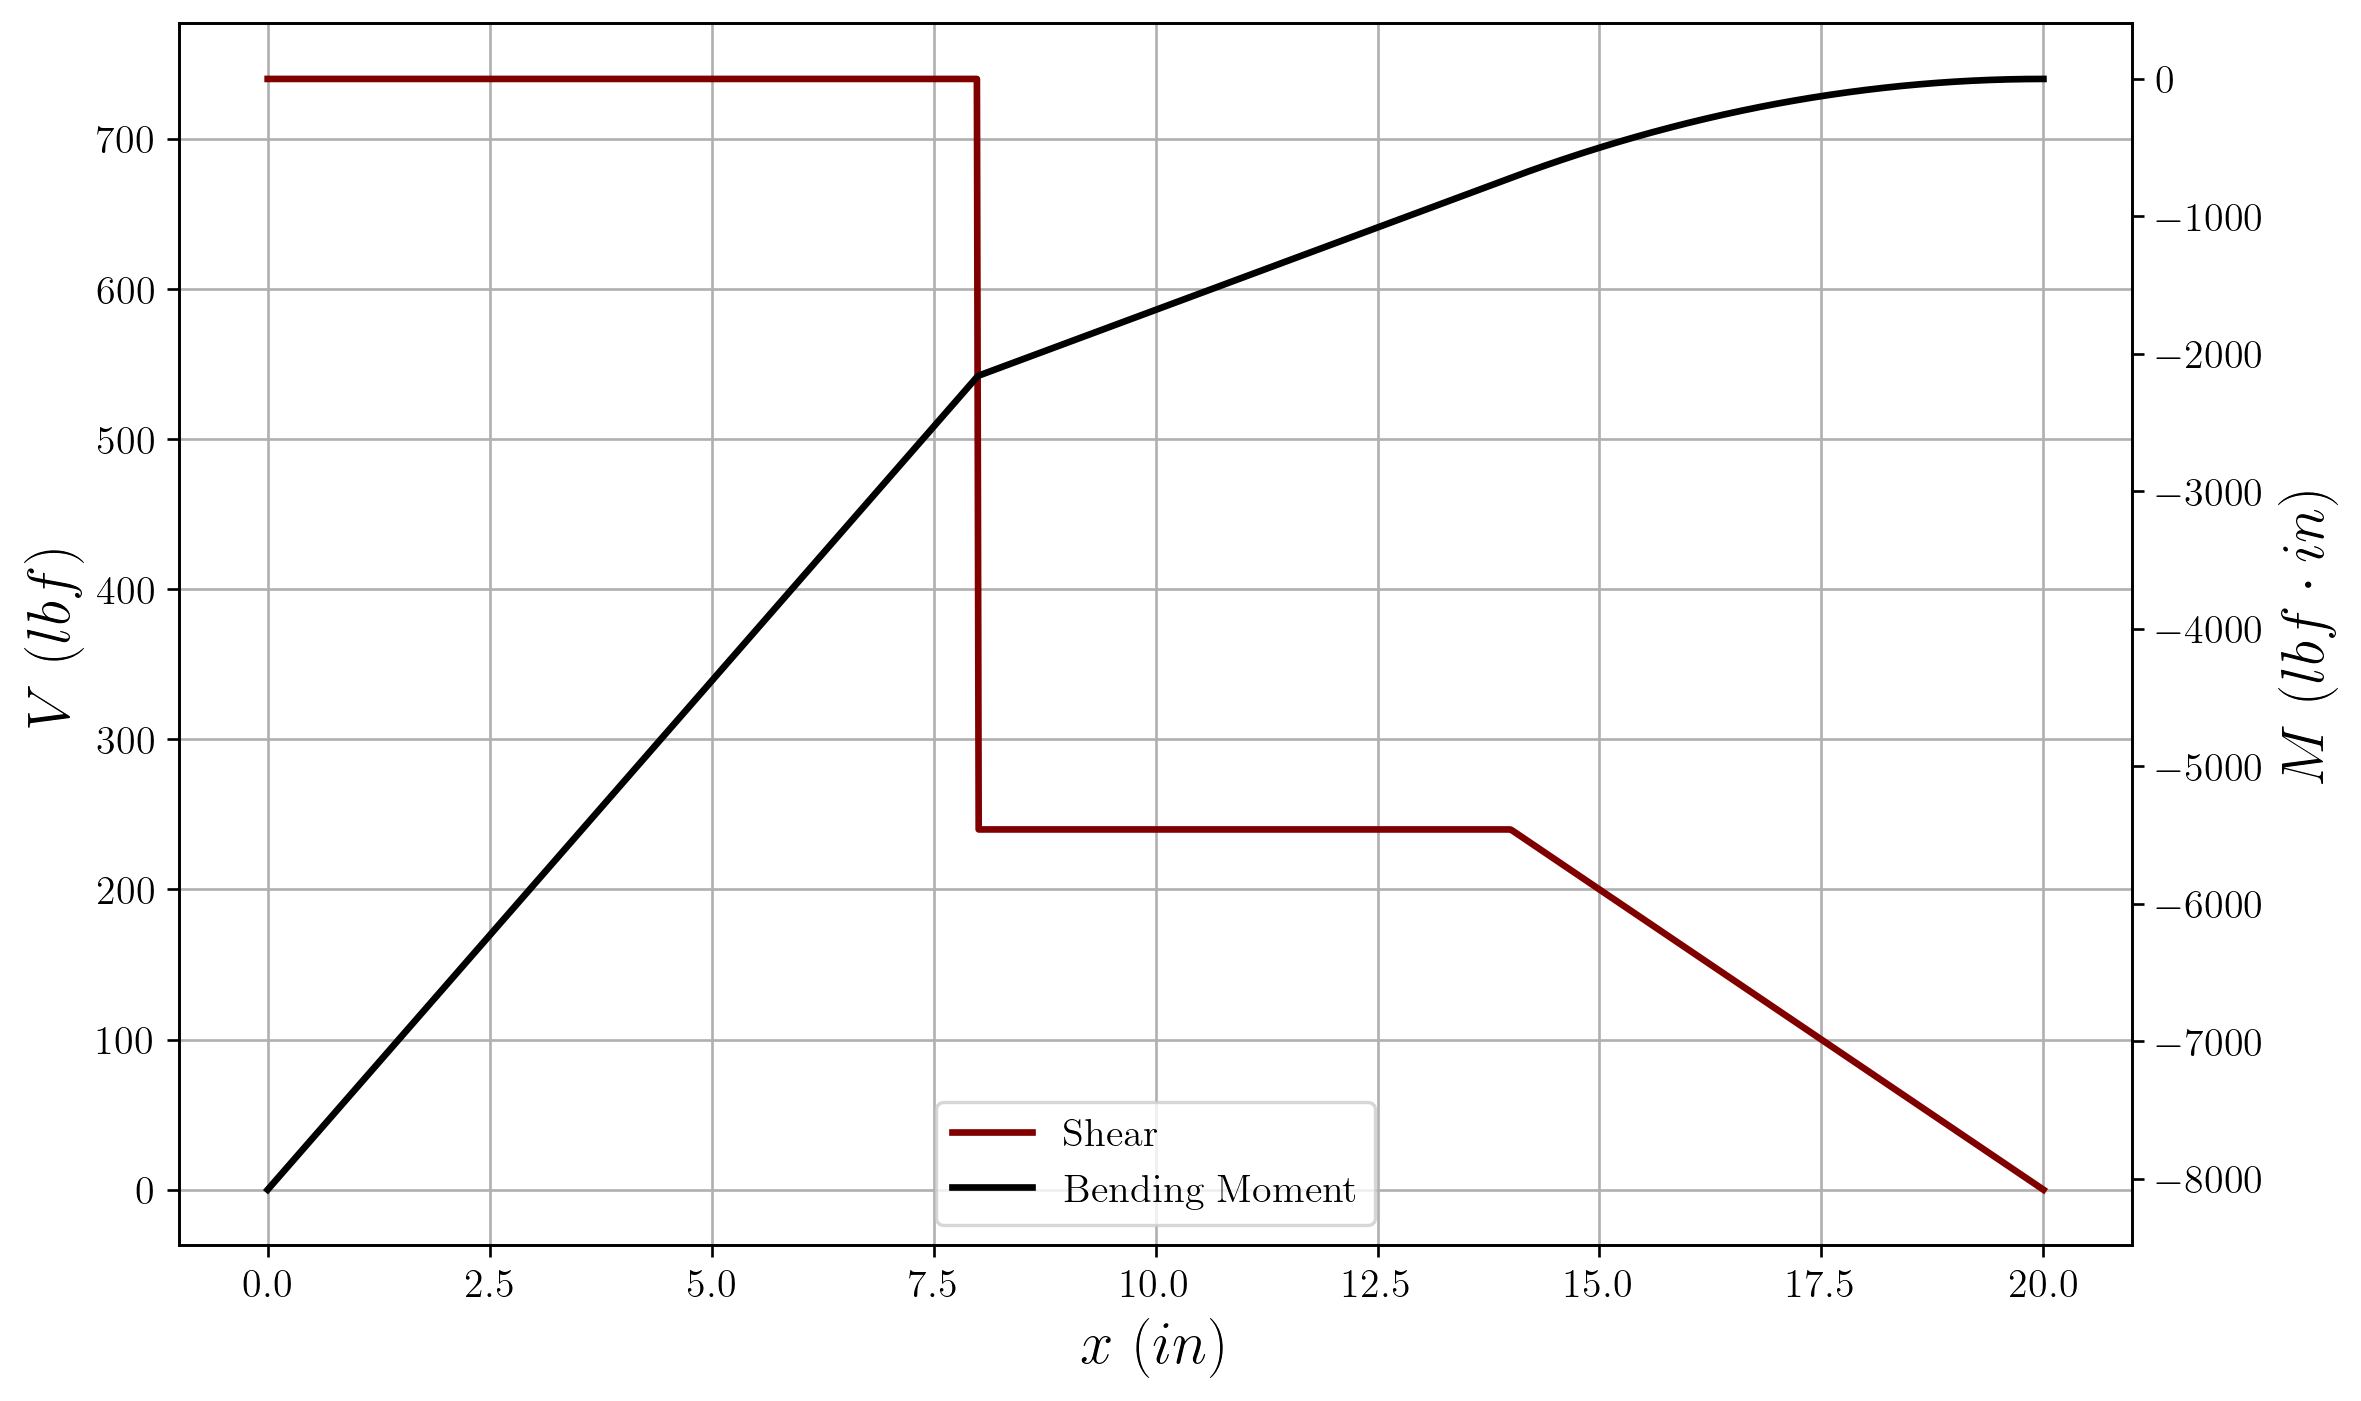

In [5]:
# Getting shear and bending diagram
x_ = np.linspace(0, 20, 1000)
V_ = sp.lambdify(x, eq1.rhs, modules='numpy')
M_ = sp.lambdify(x, eq2.rhs, modules='numpy')

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(x_, V_(x_), label='Shear')
ax2.plot(x_, M_(x_), label='Bending Moment', color='black')

ax2.grid(visible=False)
ax.legend(handles=[ax.lines[0], ax2.lines[0]], loc='lower center')

ax.set_xlabel('$x$ ($in$)')
ax.set_ylabel('$V$ ($lbf$)')
ax2.set_ylabel(r'$M$ ($lbf\cdot in$)')
plt.show()

Notice that the graph has a duel y-axis.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-17
## Given

a. $\sigma_x=12\ ksi$, $\sigma_y=6\ ksi$, $\tau_{xy}=4\ ksi\ cw$
d. $\sigma_x=9\ ksi$, $\sigma_y=19\ ksi$, $\tau_{xy}=8\ ksi\ cw$

## Find
Draw the plane stress element as seen in Figure 3-11c and d. Also draw Mohr's circle fully labeled.

## Solution
### Part A

\begin{center}
\includegraphics{images/fig4}
\end{center}

In [6]:
def mohr(s_x, s_y, t_xy):
    sig_x_, sig_y_, tau_xy_ = sp.symbols(r'\sigma_x \sigma_y \tau_{xy}')
    sig1_, sig2_, tau1, tau2 = sp.symbols(r'\sigma_1 \sigma_2 \tau_1 \tau_2')
    C_, R_ = sp.symbols('C R')
    phi_p = sp.Symbol(r'\phi_p')

    display(Markdown('**Center and Radius:**'))
    C_value = (s_x + s_y)/2
    C_sym = sp.Eq(C_, (sig_x_ + sig_y_)/2)
    C_eq = sp.Eq(C_sym, C_value, evaluate=False)
    display(C_eq)
    R_value = sp.sqrt(((s_x - s_y)/2)**2 + t_xy**2).n()
    R_sym = sp.Eq(R_, sp.sqrt(((sig_x_ - sig_y_)/2)**2 + tau_xy_**2))
    display(sp.Eq(R_sym, R_value, evaluate=False))

    display(Markdown('---'))

    display(Markdown('**Principle Stresses:**'))
    sig1_value = C_value + R_value
    sig2_value = C_value - R_value
    sig1_sym, sig2_sym = sp.Eq(sig1_, C_ + R_), sp.Eq(sig2_, C_ - R_)
    tau1_sym, tau2_sym = sp.Eq(tau1, R_), sp.Eq(tau2, -R_)
    display(sp.Eq(sig1_sym, sig1_value, evaluate=False))
    display(sp.Eq(sig2_sym, sig2_value, evaluate=False))
    display(sp.Eq(tau1_sym, R_value, evaluate=False))
    display(sp.Eq(tau2_sym, -R_value, evaluate=False))

    display(Markdown('---'))

    display(Markdown('**Angle of Occurrence:**'))
    c_num = s_x - s_y + 2*t_xy*sp.I
    phi_value = (sp.arg(c_num)*180/sp.pi).n()
    phi_sym = sp.Eq(2*phi_p, sp.atan(2*tau_xy_/(sig_x_ - sig_y_)))
    display(sp.Eq(phi_sym, phi_value, evaluate=False))

mohr(12, 6, 4)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 9.0)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 5.0)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 14.0)

Eq(Eq(\sigma_2, C - R), 4.0)

Eq(Eq(\tau_1, R), 5.0)

Eq(Eq(\tau_2, -R), -5.0)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 53.130102354156)

### Part D

\begin{center}
\includegraphics{images/fig5}
\end{center}

In [7]:
mohr(9, 19, 8)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 14.0)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 9.4339811320566)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 23.4339811320566)

Eq(Eq(\sigma_2, C - R), 4.5660188679434)

Eq(Eq(\tau_1, R), 9.4339811320566)

Eq(Eq(\tau_2, -R), -9.4339811320566)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 122.005383208084)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-72
## Given
A 2-foot-long steel bar with a $\frac{3}{4}\ in$ diameter is to be used as a torsion spring. The torsional stress in the bar is not to exceed $30\ ksi$.

## Find
What is the maximum angle of twist of the bar?

## Solution
Use the following relationship to determine the torque,

$$\tau=\frac{Tc}{J}$$

The angle of twist is,

$$\phi=\frac{TL}{JG}$$

In [8]:
# Find torque
c = sp.S('0.75')/2
J = sp.pi/2*c**4
tau = 30_000
T = tau*J/c
T.n()  # torque in lbf*in

2485.04887637474

In [9]:
# Find angle of twist
G = sp.S('11.5e6')  # from Table A-5
L = 24
phi = (T*L/(J*G))
(phi*180/sp.pi).n()  # angle of twist in degrees

9.56590405783635

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-82
## Given

\begin{center}
\includegraphics{images/fig6}
\end{center}

A counter shaft carrying two V-belt pulleys is shown in the figure. Pulley $A$ receives power from a motor through a belt with the belt tensions shown. The power is transmitted through the shaft and delivered to the belt on pulley $B$. Assume the belt tension on the loose side at $B$ is 15 percent of the tension on the tight side.

## Find
a. Determine the tensions in the belt on pulley B, assuming the shaft is running at a constant speed.
b. Find the magnitudes of the bearing reaction forces, assuming the bearings act as simple supports.
c. Draw shear-force and bending-moment diagrams for the shaft. If needed, make one set for the horizontal plane and another set for the vertical plane.
d. At the point of maximum bending moment, determine the bending stress and the torsional shear stress.
e. At the point of maximum bending moment, determine the principal stresses and the maximum shear stress.

## Solution
### Part A
The directions of the torques about $A$ and $B$ are,

\begin{center}
\includegraphics{images/fig7}
\end{center}

Since the shaft has no angular acceleration, $T_A=T_B$ (with directions shown above). It should also be noted that $T_1$ must be greater than $T_2$ because the torque shows that the pulley is more tensile at the bottom.

In [10]:
# Solving for T1 and T2
T1, T2 = sp.symbols('T_1 T_2')
T_A = sp.S('0.125')*(300 - 45)
eq1 = sp.Eq(sp.S('0.15')*(T1 - T2), T_A)
eq2 = sp.Eq(T2, sp.S(0.15)*T1)

[display(eq) for eq in [eq1, eq2, Markdown('---')]]

sol = sp.solve([eq1, eq2], dict=True)[0]
_ = [display(sp.Eq(key, value)) for key, value in sol.items()]

Eq(0.15*T_1 - 0.15*T_2, 31.875)

Eq(T_2, 0.15*T_1)

---

Eq(T_1, 250.0)

Eq(T_2, 37.5)

### Part B

In [11]:
# Solving for the reactions
Oy, Oz, Cy, Cz = sp.symbols('O_y O_z C_y C_z')

eq1 = sp.Eq((300 + 45)*sp.sin(sp.pi/4) - Oy - Cy, 0)  # Forces in y direction
eq2 = sp.Eq(sol[T1] + sol[T2] + Oz - Cz - (45 + 300)*sp.cos(sp.pi/4), 0)  # Forces in z direction
eq3 = sp.Eq(sp.S('0.3')*(45 + 300)*sp.sin(sp.pi/4) - Cy*sp.S('0.85'), 0)  # Moments about z-axis
eq4 = sp.Eq(sp.S('0.3')*(45 + 300)*sp.cos(sp.pi/4) - sp.S('0.7')*(sol[T1] + sol[T2]) + Cz*sp.S('0.85'), 0)  # Moments about the y-axis

sol2 = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
[display(eq) for eq in [eq1, eq2, eq3, eq4, Markdown('---')]]
_ = [display(sp.Eq(key, value)) for key, value in sol2.items()]

Eq(-C_y - O_y + 345*sqrt(2)/2, 0)

Eq(-C_z + O_z - 345*sqrt(2)/2 + 287.5, 0)

Eq(-0.85*C_y + 51.75*sqrt(2), 0)

Eq(0.85*C_z - 201.25 + 51.75*sqrt(2), 0)

---

Eq(C_y, 86.1006492385973)

Eq(O_y, 157.851190270762)

Eq(C_z, 150.664056643756)

Eq(O_z, 107.115896153115)

### Part C
The shear and bending moment diagram for the two planes is,

\begin{center}
\includegraphics{images/fig8}
\end{center}

### Part D

In [12]:
# Getting max bending moment
M_A = sp.sqrt(47.35535708**2 + 32.13476885**2)
M_B = sp.sqrt(12.91509739**2 + 22.59960847**2)
sp.Matrix([M_A, M_B])

Matrix([
[57.2291290621938],
[26.0296377921492]])

The maximum bending moment occurs at point $A$.

In [13]:
# Getting the bending stress
c = sp.S('0.01')
sig_x = (M_A*c/(sp.pi/4*c**4)).n()
sig_x  # in Pa

72866390.2327375

In [14]:
# Getting the torsional stress
t_xz = (31.875*c/(sp.pi/2*c**4)).n()
t_xz  # in Pa

20292255.2442167

### Part E

In [15]:
mohr(sig_x, 0, t_xz)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 36433195.1163688)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 41703157.3059383)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 78136352.422307)

Eq(Eq(\sigma_2, C - R), -5269962.18956954)

Eq(Eq(\tau_1, R), 41703157.3059383)

Eq(Eq(\tau_2, -R), -41703157.3059383)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 29.1165652891492)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3-91
## Given

\begin{center}
\includegraphics{images/fig9}
\end{center}

The cantilevered bar in the figure is made from a ductile material and is statically loaded with $F_y=200\ lbf$ and $F_x=F_z=0$.

## Find
Analyze the stress situation on rod $AB$ by obtaining the following:

a. Determine the precise location of the critical stress element.
b. Sketch the critical stress element and determine magnitudes and directions for all stresses acting on it. (Transverse shear may only be neglected if you can justify this decision.)
c. For the critical stress element, determine the principal stresses and the maximum shear stress.

## Solution
### Part A
The critical stress element will be at the top or bottom ($y=\pm0.5\ in$) because both the bending stress and shear stress are maximized at the farthest distance away from the neutral axis.

### Part B

In [16]:
# Acquiring shear stress
T = 5*200
c = sp.S('0.5')
J = sp.pi/2*c**4
t_xz = (T*c/J).n()
t_xz  # in psi

5092.95817894065

In [17]:
# Acquiring the bending stress
M = 8*200
I = sp.pi/4*c**4
sig_x = (M*c/I).n()
sig_x  # in psi

16297.4661726101

\begin{center}
\includegraphics{images/fig10}
\end{center}

The transverse shear, $\tau_{xy}$, is being neglected because the rod is a magnitude longer than its diameter.

### Part C

In [18]:
mohr(sig_x, 0, t_xz)

**Center and Radius:**

Eq(Eq(C, \sigma_x/2 + \sigma_y/2), 8148.73308630504)

Eq(Eq(R, sqrt(\tau_{xy}**2 + (\sigma_x/2 - \sigma_y/2)**2)), 9609.37427329589)

---

**Principle Stresses:**

Eq(Eq(\sigma_1, C + R), 17758.1073596009)

Eq(Eq(\sigma_2, C - R), -1460.64118699085)

Eq(Eq(\tau_1, R), 9609.37427329589)

Eq(Eq(\tau_2, -R), -9609.37427329589)

---

**Angle of Occurrence:**

Eq(Eq(2*\phi_p, atan(2*\tau_{xy}/(\sigma_x - \sigma_y))), 32.0053832080835)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 4-46
## Given

\begin{center}
\includegraphics{images/fig11}
\end{center}

The diameter is uniform with $l=300\ mm$, $a=100\ mm$, and $F=3\ kN$. The allowable slope ath the bearings is $0.001\ mm/mm$ and the design factor is 1.28. The shaft is steel with $E=207\ GPa$. The relationship for the diameter is,

$$d=\left|\frac{32Fb(l^2-b^2)}{3\pi El\xi}\right|^{1/4}$$

## Find
What uniform diameter will the shaft support? Determine the maximum deflection of the shaft.

## Solution
### Uniform Diameter
We can use the given relationship to determine the diameter.

In [19]:
E = sp.S('207e9')
l, a = sp.S('0.3'), sp.S('0.1')
xi = sp.S('0.001')
b = l - a
n = sp.S('1.28')
F = n*3_000

d = (sp.Abs(32*F*b*(l**2 - b**2)/(3*sp.pi*E*l*xi))**sp.S('0.25')).n()
d  # in meters

0.0380653317176321

### Maximum Deflection
The maximum deflection equation may be found from Table A-9. The deflection may be graphed like so,

In [20]:
x = sp.Symbol('x')
I = sp.pi/4*(d/2)**4
F = 3_000
y_AB = F*b*x/(6*E*I*l)*(x**2 + b**2 - l**2)
y_BC = F*a*(l - x)/(6*E*I*l)*(x**2 + a**2 - 2*l*x)

y = sp.Piecewise((y_AB, (x >= 0) & (x < a)), (y_BC, (x >= a) & (x <= l)))
y

Piecewise((0.0490873852123405*x*(x**2 - 0.05)/pi, (x < 0.1) & (x >= 0)), (8.18123086872342e-5*(90.0 - 300.0*x)*(x**2 - 0.6*x + 0.01)/pi, (x >= 0.1) & (x <= 0.3)))

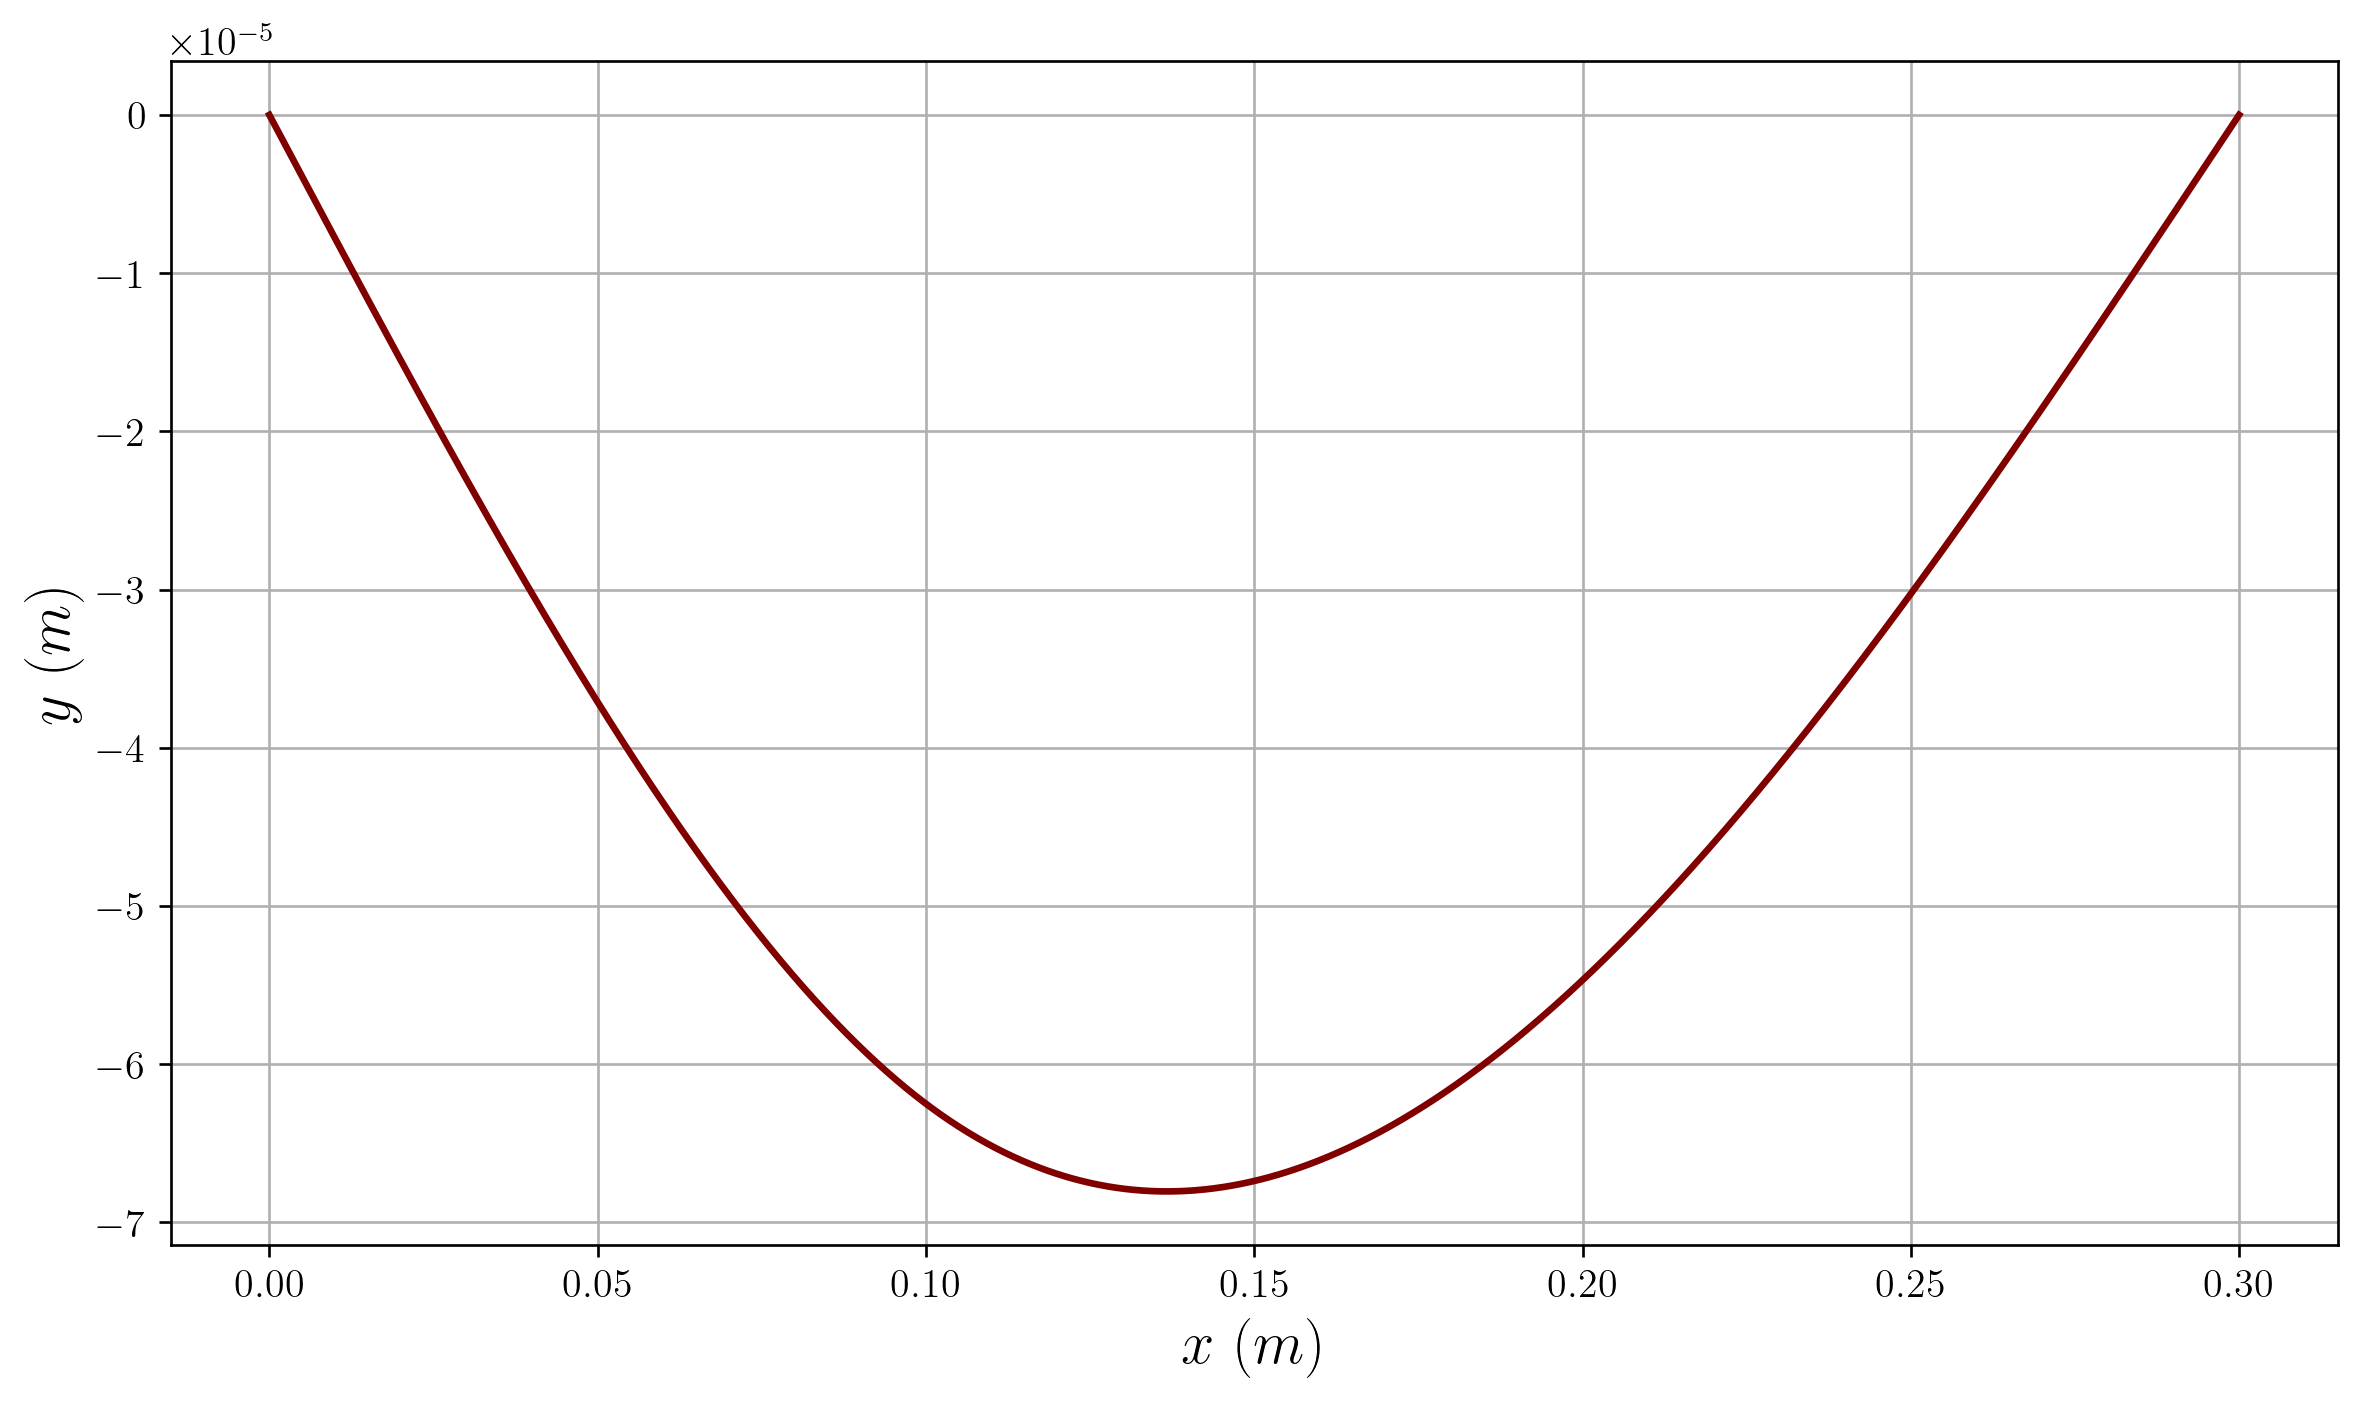

In [21]:
x_ = np.linspace(0, 0.3, 10_000)
y_lamb = sp.lambdify(x, y, modules='numpy')

fig, ax = plt.subplots()
ax.plot(x_, y_lamb(x_))
ax.set_xlabel('$x$ ($m$)')
ax.set_ylabel('$y$ ($m$)')

plt.show()

With access to numerical tools, the maximum deflection may be obtained by simply calculating the maximum value from a discritized data set rather than taking the derivative symbolically.

In [22]:
# Getting the maximum magnitude
y_max = np.max(np.abs(y_lamb(x_)))
y_max*1_000  # in mm

0.06804138155566049

This answer is not rounded, but the one in the back of the book is rounded.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 5-1
## Given
A ductile hot-rolled steel bar has a minimum yield strength in tension and compression of $350\ MPa$.

$\sigma_x=-50\ MPa$, $\sigma_y=-75\ MPa$, and $\tau_{xy}=-50\ MPa$

## Find
Use the distortion-energy and maximum shear stress methods to determine the factor of safety.

## Solution
Begin by getting the principal stresses.

In [23]:
sig_x, sig_y, sig_z, tau_xy, tau_zx, tau_yz = sp.symbols(r'\sigma_x \sigma_y \sigma_z \tau_{xy} \tau_{zx} \tau_{yz}')
sig = sp.Symbol(r'\sigma')
sig1, sig2, sig3 = sp.symbols(r'\sigma_1 \sigma_2 \sigma_3')

poly = sig**3 - (sig_x + sig_y + sig_z)*sig**2 + (sig_x*sig_y + sig_x*sig_z + sig_y*sig_z - tau_xy**2 - tau_yz**2 - tau_zx**2)*sig - (sig_x*sig_y*sig_z + 2*tau_xy*tau_yz*tau_zx - sig_x*tau_yz**2 - sig_y*tau_zx**2 - sig_z*tau_xy**2)
display(sp.Eq(poly.simplify(), 0))

def get_principal(sx, sy, sz, txy, tyz, tzx):
    poly_ = poly.subs([(sig_x, sx), (sig_y, sy), (sig_z, sz), (tau_xy, txy), (tau_yz, tyz), (tau_zx, tzx)])
    roots = [sp.re(root.n()) for root in sp.roots(poly_, sig)]
    roots_ = sorted(list(roots), reverse=True)
    for i, j in zip((sig1, sig2, sig3), roots_):
        display(sp.Eq(i, j))
    return roots_

def von_mises(s1_, s2_, s3_):
    return (1/sp.sqrt(2)*sp.sqrt((s1_ - s2_)**2 + (s2_ - s3_)**2 + (s3_ - s1_)**2)).n()

s1, s2, s3 = get_principal(-50, -75, 0, -50, 0, 0)

Eq(\sigma**3 - \sigma**2*(\sigma_x + \sigma_y + \sigma_z) + \sigma*(\sigma_x*\sigma_y + \sigma_x*\sigma_z + \sigma_y*\sigma_z - \tau_{xy}**2 - \tau_{yz}**2 - \tau_{zx}**2) - \sigma_x*\sigma_y*\sigma_z + \sigma_x*\tau_{yz}**2 + \sigma_y*\tau_{zx}**2 + \sigma_z*\tau_{xy}**2 - 2*\tau_{xy}*\tau_{yz}*\tau_{zx}, 0)

Eq(\sigma_1, 0)

Eq(\sigma_2, -10.9611796797792)

Eq(\sigma_3, -114.038820320221)

### Maximum Shear Stress Method

In [24]:
Sy = 350
Sy/(s1 - s3)

3.06913031033819

### Distortion Energy Method

In [25]:
s_vm = von_mises(s1, s2, s3)
Sy/s_vm

3.21182027418786

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 5-12
## Given
A ductile material has the properties $S_{yt}=60\ ksi$ and $S_{yc}=75\ ksi$.

## Find
Using the ductile Coulomb-Mohr theory, determine the factor of safety for the states of plane stresses,

a. $\sigma_x=25\ ksi$, $\sigma_y=15\ ksi$
b. $\sigma_x=15\ ksi$, $\sigma_y=-15\ ksi$
c. $\sigma_x=20\ ksi$, $\tau_{xy}=-10\ ksi$
d. $\sigma_x=-12\ ksi$, $\sigma_y=15\ ksi$, $\tau_{xy}=-9\ ksi$
e. $\sigma_x=-24\ ksi$, $\sigma_y=-24\ ksi$, $\tau_{xy}=-15\ ksi$

## Solution
Using Eq. 5-26, the block below will execute all parameters in a for loop.

In [26]:
sig_values = [[25, 15, 0],
       [15, -15, 0],
       [20, 0, -10],
       [-12, 15, -9],
       [-24, -24, -15]]
a = 'ABCDE'
St, Sc = 60, 75

for l, row in zip(a, sig_values):
    s_x_, s_y_, t_xy_ = row
    display(Markdown(f'### Part {l}'))
    s1, s2, s3 = get_principal(s_x_, s_y_, 0, t_xy_, 0, 0)
    n = 1/(s1/St - s3/Sc)
    display(Markdown('---'))
    display(sp.Eq(sp.Symbol("n"), n.n()))

### Part A

Eq(\sigma_1, 25.0)

Eq(\sigma_2, 15.0)

Eq(\sigma_3, 0)

---

Eq(n, 2.4)

### Part B

Eq(\sigma_1, 15.0)

Eq(\sigma_2, 0)

Eq(\sigma_3, -15.0)

---

Eq(n, 2.22222222222222)

### Part C

Eq(\sigma_1, 24.142135623731)

Eq(\sigma_2, 0)

Eq(\sigma_3, -4.14213562373095)

---

Eq(n, 2.18532709217848)

### Part D

Eq(\sigma_1, 17.724980739588)

Eq(\sigma_2, 0)

Eq(\sigma_3, -14.724980739588)

---

Eq(n, 2.03355602443072)

### Part E

Eq(\sigma_1, 0)

Eq(\sigma_2, -9.0)

Eq(\sigma_3, -39.0)

---

Eq(n, 1.92307692307692)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 5-19
## Given
A brittle material has properties $S_{ut}=30\ ksi$ and $S_{uc}=90\ ksi$.

$\sigma_x=25\ ksi$, $\tau_{xy}=15\ ksi$

## Find
Using the Coulomb-Mohr and modified-Mohr methods, determine the factor of safety.

## Solution
The principal stresses are,

In [27]:
s1, s2, s3 = get_principal(25, 15, 0, 0, 0, 0)

Eq(\sigma_1, 25.0)

Eq(\sigma_2, 15.0)

Eq(\sigma_3, 0)

### Brittle Coulomb-Mohr
Using Eq. 5-31,

In [28]:
St = 30
St/s1

1.20000000000000

### Modified-Mohr
Using Eq. 5-32,

In [29]:
St/s1

1.20000000000000

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Test 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 5-49
## Given

\begin{center}
\includegraphics{images/fig12}
\end{center}

Cantilevered rod $OA$ is 0.5 meters long and made from AISI 1010 hot-rolled steel. A constant force and torque are applied as shown.

## Find
Determine the minimum diameter for the rod that will achieve a minimum static factor of safety of 2 using,

a. the maximum shear stress method
b. the distortion energy method

## Solution
There are three unknowns and adding and two equations for the principal stress as well as an extra equation for the factor of safety. The two principal stress equations with the substitutions for $\tau_{xy}$ and $\sigma_x$ are,

In [30]:
d = sp.Symbol('d', real=True, positive=True)  # diameter of the rod
c = d/2
J = sp.pi/2*c**4
I = sp.pi/4*c**4
M = sp.S('0.5')*150
T = 25
t_xy_ = T*c/J
s_x_ = M*c/I

eq1 = sp.Eq(sig1, (s_x_/2 + sp.sqrt((s_x_/2)**2 + t_xy_**2)).n())
eq2 = sp.Eq(sig3, (s_x_/2 - sp.sqrt((s_x_/2)**2 + t_xy_**2)).n())
display(eq1, eq2)

Eq(\sigma_1, 784.605560256445/d**3)

Eq(\sigma_3, -20.6618334153475/d**3)

### Maximum Shear Stress Method

In [31]:
Sy = sp.S('180e6')  # Table A-20
eq_mss = sp.Eq(sig1 - sig3, Sy/2)
eq_mss

Eq(\sigma_1 - \sigma_3, 90000000.0)

In [32]:
# Solving
sol = sp.solve([eq1, eq2, eq_mss], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(\sigma_1, 87690748.4122731)

Eq(\sigma_3, -2309251.58772688)

Eq(d, 0.0207602478902345)

### Distortion Energy Method

In [33]:
eq_de = sp.Eq(von_mises(sig1, 0, sig3), Sy/2)
eq_de

Eq(0.707106781186548*(\sigma_1**2 + \sigma_3**2 + (-\sigma_1 + \sigma_3)**2)**0.5, 90000000.0)

In [34]:
sol2 = sp.solve([eq1, eq2, eq_de], dict=True)[0]
for key, value in sol2.items():
    display(sp.Eq(key, value))

Eq(\sigma_1, 88807873.0461385)

Eq(\sigma_3, -2338669.99139147)

Eq(d, 0.0206728317903113)